In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
data = pd.read_csv('F:/AI（CV）/CLASSDATA_第二门_Python快速掌握/项目01_电影数据处理及分析实战/爱奇艺视频数据.csv',engine='python')
print(data.head())

       数据获取日期   演员  视频ID                                        详细链接  \
0  2016年5月24日  NaN   100  http://www.iqiyi.com/dianshiju/douyu2.html   
1  2016年5月24日  NaN  1037   http://www.iqiyi.com/dianshiju/jhuxd.html   
2  2016年5月24日  NaN  1573  http://www.iqiyi.com/dianshiju/fmxqj2.html   
3  2016年5月24日  NaN  1739    http://www.iqiyi.com/dianshiju/qtjm.html   
4  2016年5月24日  NaN  1756   http://www.iqiyi.com/dianshiju/18jbj.html   

               剧名   状态                     类型 来源平台     整理后剧名 更新时间    ...     \
0     斗鱼Ⅱ(1-20)全集  已完结  粤语电视剧/偶像剧/言情剧/超清1080P  爱奇艺       斗鱼2  NaN    ...      
1    江湖兄弟(1-32)全集  已完结  粤语电视剧/悬疑剧/年代剧/超清1080P  爱奇艺    江湖兄弟全集  NaN    ...      
2  肥猫寻亲记2(1-30)全集  已完结           粤语电视剧/家庭剧/喜剧  爱奇艺  肥猫寻亲记2全集  NaN    ...      
3    舞台姐妹(1-34)全集  已完结          粤语电视剧/年代剧/家庭剧  爱奇艺    舞台姐妹全集  NaN    ...      
4   18禁不禁(1-30)全集  已完结   粤语电视剧/偶像剧/超清1080P/喜剧  爱奇艺   18禁不禁全集  NaN    ...      

     上映年份                                                 简介   导演      差评数  \
0  2004.0  在单子

数据清晰 - 去除空值

In [3]:
cols = data.columns.tolist()
for col in cols:
    #si = data[col]
    #print('%s 字段的缺失值数量为%i条' %(col,len(si[si.isnull()])))
    if data[col].dtype == 'object':
        data[col].fillna('缺失数据',inplace = True)
    else:
        data[col].fillna(0,inplace = True)
print(type(data))     

<class 'pandas.core.frame.DataFrame'>


In [3]:
def shujuqinxi(df):
    cols = df.columns.tolist()
    for col in cols:
        if data[col].dtype == 'object':
            data[col].fillna('缺失数据',inplace = True)
        else:
            data[col].fillna(0,inplace = True)
    return df

In [4]:
data_cl = shujuqinxi(data)
#print(data_cl.head())

数据清晰 —— 时间标签转化

In [5]:
def changtime(df,*cols):
    for col in cols :
        df[col] = df[col].str.replace('年','-')
        df[col] = df[col].str.replace('月','-')
        df[col] = df[col].str.replace('日','')
        df[col] = pd.to_datetime(df[col])
    return df

In [6]:
data_ct = changtime(data_cl,'数据获取日期')
print(data_ct['数据获取日期'].head())
data_ct['数据获取日期'].dtype

0   2016-05-24
1   2016-05-24
2   2016-05-24
3   2016-05-24
4   2016-05-24
Name: 数据获取日期, dtype: datetime64[ns]


dtype('<M8[ns]')

In [7]:
data_goodrank = data_ct.groupby('导演')[['好评数','评分人数']].sum()
data_goodrank['好评率'] = data_goodrank['好评数']/data_goodrank['评分人数']
goodrank = data_goodrank.sort_values(['好评率'],ascending= False)[:20]
print(goodrank)

                  好评数          评分人数       好评率
导演                                           
王静       5.601448e+06  5.602704e+06  0.999776
萧锋       4.415545e+07  4.416801e+07  0.999716
向灼       3.685386e+06  3.691240e+06  0.998414
乌兰塔娜     1.916524e+07  1.920091e+07  0.998142
徐宗政      3.113422e+06  3.123920e+06  0.996639
欧凡       3.088701e+06  3.100421e+06  0.996220
肖光辉      3.264290e+05  3.284140e+05  0.993956
张国立/罗长安  8.177111e+06  8.230880e+06  0.993467
刘逢声/林峰   3.591638e+06  3.617351e+06  0.992892
林添一      1.049628e+09  1.057556e+09  0.992504
毛尉光      1.747925e+06  1.766237e+06  0.989632
郭东旭      1.027664e+06  1.039609e+06  0.988510
苏沅峰/张艺腾  3.600976e+06  3.643071e+06  0.988445
袁刚/成志超   1.185439e+07  1.200596e+07  0.987375
胡雪杨      1.042170e+06  1.056247e+06  0.986673
丁晓雄      1.568219e+06  1.591727e+06  0.985231
延艺       4.094535e+07  4.157757e+07  0.984794
潇庸       5.338679e+06  5.427978e+06  0.983548
白羽/陈迅    1.705608e+07  1.737295e+07  0.981761
张蠡/姜峰    2.100617e+08  2.143382e+0

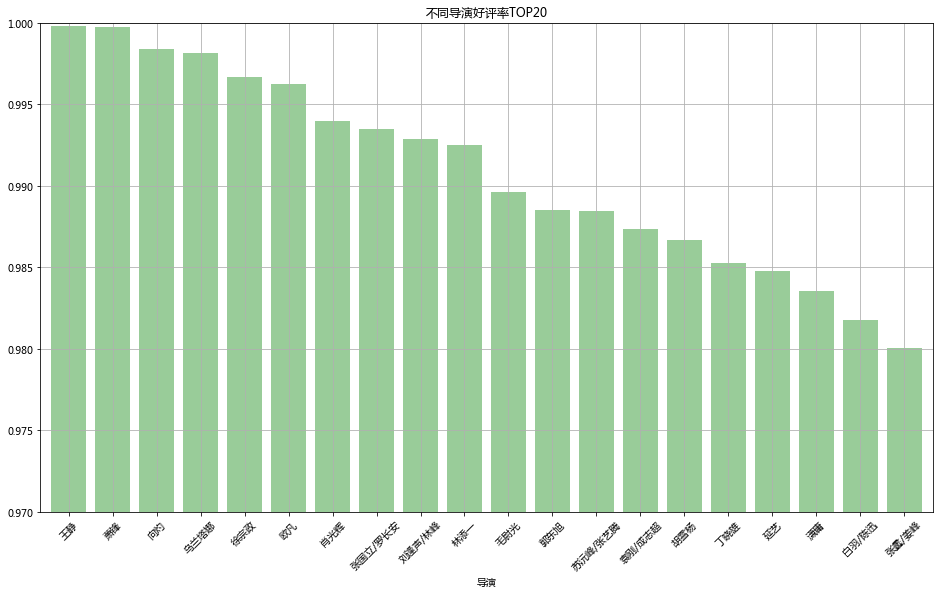

In [31]:
goodrank['好评率'].plot(figsize = (16,9),
                     title = '不同导演好评率TOP20',
                     width = 0.8,
                     kind = 'bar',
                     color = 'Green',
                     alpha = 0.4,
                     rot = 45,
                     grid = True,
                     ylim = [0.97,1]
)

In [52]:
data_p1 = data_ct[['导演','上映年份','整理后剧名']].drop_duplicates()
data_p1 = data_p[data_p['上映年份']>2000]
data_p1 = data_p[data_p['上映年份']<=2016]
data_p2 = data_ct.groupby('整理后剧名').sum()[['评分人数','好评数']]
data_p3 = pd.merge(data_p1,data_p2,left_on='整理后剧名',right_index=True)
data_p4 = data_p3.groupby('上映年份').sum()[['评分人数','好评数']]
data_p4

,评分人数,好评数
上映年份,,
2001.0,2.244512e+07,1.882423e+07
2002.0,1.131590e+08,1.014469e+08
2003.0,1.975678e+08,1.832563e+08
2004.0,3.247454e+08,3.094027e+08
2005.0,1.239505e+08,1.114701e+08
2006.0,2.883226e+08,2.579299e+08
2007.0,3.903365e+08,3.704407e+08
2008.0,1.892441e+08,1.738215e+08
2009.0,1.758459e+08,1.577503e+08


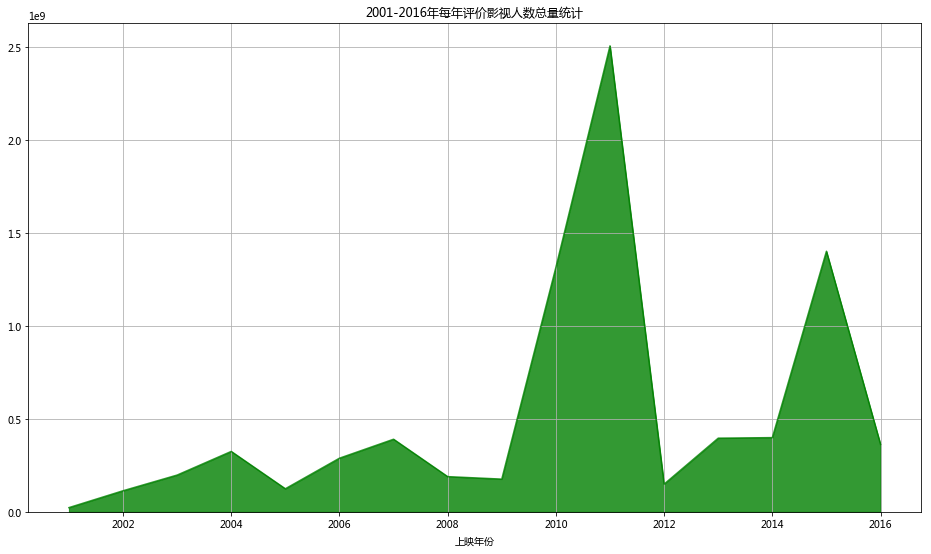

In [68]:
data_p4['评分人数'].plot.area(figsize = (16,9),title = '2001-2016年每年评价影视人数总量统计',
                         grid = True,
                         color = 'Green',
                         alpha = 0.8
                         )

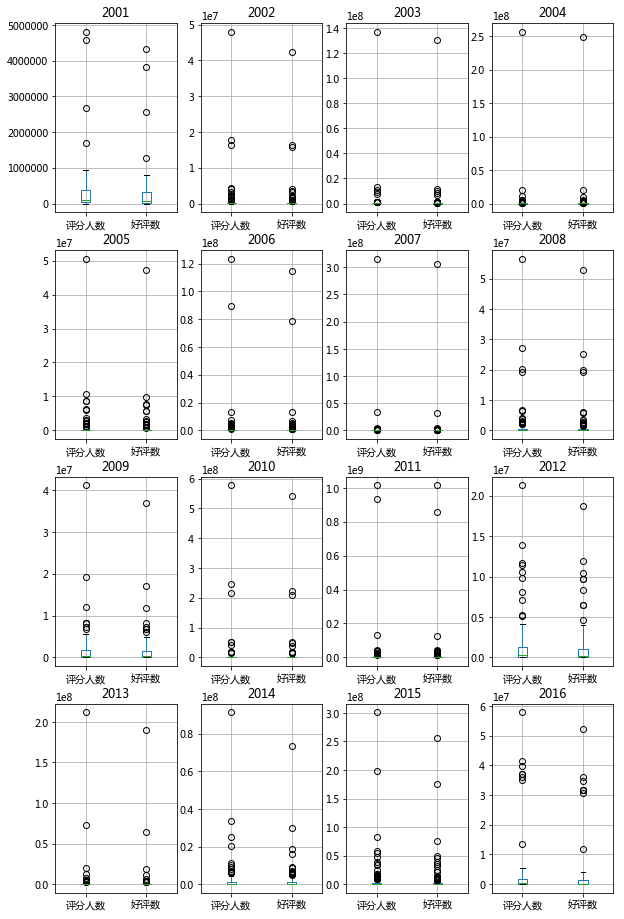

In [81]:
fig,axes = plt.subplots(4,4,figsize=(10,16))
start_year = 2001
for i in range(4):
    for j in range(4):
        data_eachyear = data_p3[data_p3['上映年份'] == start_year]
        data_eachyear[['评分人数','好评数']].boxplot(whis = 3,ax = axes[i,j])
        color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
        axes[i,j].set_title('%s'%start_year)
        start_year +=1